### Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [3]:
x,y = make_moons(n_samples = 200, noise = 0.1)

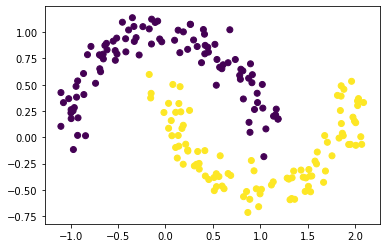

In [4]:
plt.scatter(x[:,0],x[:,1],c = y)

In [5]:
y_oht = np.zeros((200,2))

In [6]:
a = np.arange(0,2)

In [7]:
y_oht[np.arange(0,200),y] = 1

In [8]:
N_SAMPLES = 200

In [9]:
noise = np.random.randn(N_SAMPLES)

In [10]:
M = 2

In [11]:
x = np.random.randn(N_SAMPLES)

In [12]:
y = M*(x + noise/2)

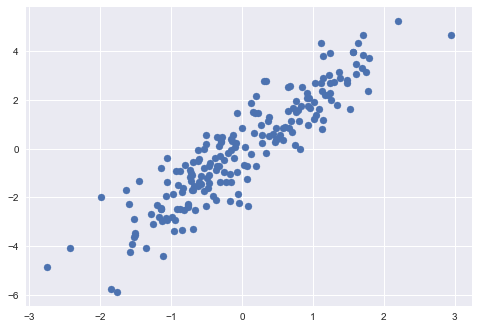

In [13]:
plt.style.use('seaborn')
plt.scatter(x,y)

In [14]:
N_FEATURES = 1
theta = np.zeros((N_FEATURES + 1,1))


In [15]:
x = np.reshape(x,(-1,1))

In [16]:
x = np.append(np.ones((N_SAMPLES,1)),x,axis = 1)

In [17]:
y_pred = np.dot(x,(theta))

In [18]:
print(y_pred.shape)

(200, 1)


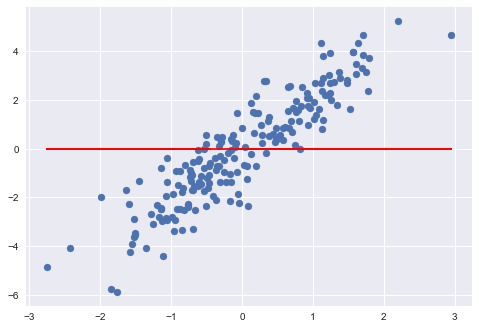

In [19]:
plt.scatter(x[:,1],y)
plt.plot(x[:,1],y_pred,c = 'red')

In [20]:
def predict(x,theta):
    return np.dot(x,theta)

def gradient(x,y,theta):
    grad = []
    for i in range(x.shape[1]):
        y_pred = predict(x,theta)
        g = np.mean(((y_pred - y)*(x[:,i].reshape((-1,1)))),axis = 0)
        grad.append(g)
    grad = np.array(grad)
    grad = grad.reshape((-1,1))
    return grad

def optimize(x,y,iterations,LEARNING_RATE):
    loss = []
    y = y.reshape((-1,1))
    N_FEATURES = x.shape[1]
    theta = np.zeros((N_FEATURES,1))
    for itr in range(iterations):
        grad = gradient(x,y,theta)
        dTheta = LEARNING_RATE * grad
        theta -= dTheta
        loss.append(np.mean((y-predict(x,theta))*(y - predict(x,theta))/2,axis = 0))
        
    return theta,loss
    

In [21]:
theta, loss = optimize(x,y,1000,0.01)

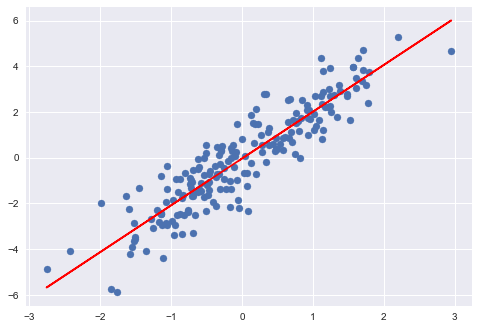

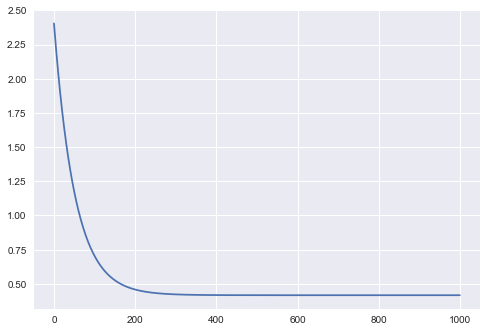

In [22]:
y_pred = predict(x,theta)
plt.scatter(x[:,1],y)
plt.plot(x[:,1],y_pred,c = 'red')
plt.show()
plt.plot(loss)
plt.show()